# Notes

### Data
- comments by host on data: https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203


In [14]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
#from IPython.display import display
#import sys


In [15]:
#np.set_printoptions(threshold=sys.maxsize)
pd.options.display.max_columns = None
pd.set_option('display.max_columns', None)


In [16]:
train_identity = pd.read_csv('Data/train_identity.csv')
train_transaction = pd.read_csv('Data/train_transaction.csv')



In [17]:
#transactions.columns.tolist()
train_transaction

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  dist1  \
0       13926    NaN  150.0    discover  142.0  credit  315.0   87.0   19.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0    NaN   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0  287.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0    NaN   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0    NaN   
...       ...    ...    ...         ...    ...     ...    ...    ...    ...   
590535   6550    NaN  150.0        visa  226.0   debit  272.0   87.0   48.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0    NaN   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0    NaN   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0    3.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0    NaN   

        dist2 P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7  \
0         NaN           NaN           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
1         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
2         NaN   outlook.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
3         NaN     yahoo.com           NaN  2.0  5.0  0.0  0.0  0.0  4.0  0.0   
4         NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
...       ...           ...           ...  ...  ...  ...  ...  ...  ...  ...   
590535    NaN           NaN           NaN  2.0  1.0  0.0  0.0  1.0  0.0  0.0   
590536    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0   
590537    NaN     gmail.com           NaN  1.0  1.0  0.0  0.0  1.0  1.0  0.0   
590538    NaN       aol.com           NaN  1.0  1.0  0.0  0.0  0.0  3.0  0.0   
590539    NaN     gmail.com           NaN  2.0  1.0  0.0  0.0  1.0  1.0  0.0   

         C8   C9  C10  C11  C12   C13  C14     D1     D2    D3    D4   D5  D6  \
0       0.0  1.0  0.0  2.0  0.0   1.0  1.0   14.0    NaN  13.0   NaN  NaN NaN   
1       0.0  0.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
2       0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
3       0.0  1.0  0.0  1.0  0.0  25.0  1.0  112.0  112.0   0.0  94.0  0.0 NaN   
4       1.0  0.0  1.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   NaN  NaN NaN   
...     ...  ...  ...  ...  ...   ...  ...    ...    ...   ...   ...  ...  ..   
590535  0.0  2.0  0.0  1.0  0.0   3.0  2.0   29.0   29.0  30.0   NaN  NaN NaN   
590536  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590537  0.0  1.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   NaN   0.0  NaN NaN   
590538  0.0  2.0  0.0  1.0  1.0   5.0  1.0   22.0   22.0   0.0  22.0  0.0 NaN   
590539  0.0  2.0  0.0  1.0  0.0   1.0  1.0    0.0    NaN   0.0   1.0  0.0 NaN   

        D7  D8  D9   D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN NaN NaN  13.0   13.0  NaN  NaN  NaN    0.0    T    T    T   M2   
1      NaN NaN NaN   0.0    NaN  NaN  NaN  NaN    0.0  NaN  NaN  NaN  

In [18]:
train_transaction.describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2          dist1         dist2  \
count  524834.000000  524834.000000  238269.000000  37627.000000   
mean      290.733794      86.800630     118.502180    231.855423   
std       101.741072       2.690623     371.872026    529.053494   
min       100.000000      10.000000       0.000000      0.000000   
25%       204.000000      87.000000       3.000000      7.000000   
50%       299.000000      87.000000       8.000000     37.000000   
75%       330.000000      87.000000      24.000000    206.000000   
max       540.000000     102.000000   10286.000000  11623.000000   

                  C1             C2             C3             C4  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       14.092458      15.269734       0.005644       4.092185   
std       133.569018     154.668899       0.150536      68.848459   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       1.000000       0.000000       0.000000   
50%         1.000000       1.000000       0.000000       0.000000   
75%         3.000000       3.000000       0.000000       0.000000   
max      4685.000000    5691.000000      26.000000    2253.000000   

                  C5             C6             C7             C8  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        5.571526       9.071082       2.848478       5.144574   
std        25.786976      71.508467      61.727304      95.378574   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000       0.000000   
50%         0.000000       1.000000       0.000000       0.000000   
75%         1.000000       2.000000       0.000000       0.000000   
max       349.000000    2253.000000    2255.000000    3331.000000   

                  C9            C10            C11            C12  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        4.480240       5.240343      10.241521       4.076227   
std        16.674897      95.581443      94.336292      86.666218   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       1.000000       0.000000   
50%         1.000000       0.000000       1.000000       0.000000   
75%         2.000000       0.000000       2.000000       0.000000   
max       210.000000    3257.000000    3188.000000    3188.000000   

                 C13            C14             D1             D2  \
count  590540.000000  590540.000000  589271.000000  309743.000000   
mean       32.539918       8.295215      94.347568     169.563231   
std       129.364844      49.544262     157.660387     177.315865   

In [19]:
train_identity


TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  \
0             2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN   
1             2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN   
2             2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN   
3             2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN   
4             2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN   
...               ...    ...       ...    ...    ...    ...    ...    ...   
144228        3577521  -15.0  145955.0    0.0    0.0    0.0    0.0    NaN   
144229        3577526   -5.0  172059.0    NaN    NaN    1.0   -5.0    NaN   
144230        3577529  -20.0  632381.0    NaN    NaN   -1.0  -36.0    NaN   
144231        3577531   -5.0   55528.0    0.0    0.0    0.0   -7.0    NaN   
144232        3577534  -45.0  339406.0    NaN    NaN  -10.0 -100.0    NaN   

        id_08  id_09  id_10  id_11     id_12  id_13  id_14  id_15     id_16  \
0         NaN    NaN    NaN  100.0  NotFound    NaN -480.0    New  NotFound   
1         NaN    NaN    NaN  100.0  NotFound   49.0 -300.0    New  NotFound   
2         NaN    0.0    0.0  100.0  NotFound   52.0    NaN  Found     Found   
3         NaN    NaN    NaN  100.0  NotFound   52.0    NaN    New  NotFound   
4         NaN    0.0    0.0  100.0  NotFound    NaN -300.0  Found     Found   
...       ...    ...    ...    ...       ...    ...    ...    ...       ...   
144228    NaN    0.0    0.0  100.0  NotFound   27.0    NaN  Found     Found   
144229    NaN    NaN    NaN  100.0  NotFound   27.0 -300.0    New  NotFound   
144230    NaN    NaN    NaN  100.0  NotFound   27.0    NaN    New  NotFound   
144231    NaN    0.0    0.0  100.0  NotFound   27.0 -300.0  Found     Found   
144232    NaN    NaN    NaN  100.0  NotFound   27.0    NaN    New  NotFound   

        id_17  id_18  id_19  id_20  id_21  id_22 id_23  id_24  id_25  id_26  \
0       166.0    NaN  542.0  144.0    NaN    NaN   NaN    NaN    NaN    NaN   
1       166.0    NaN  621.0  500.0    NaN    NaN   NaN    NaN    NaN    NaN   
2       121.0    NaN  410.0  142.0    NaN    NaN   NaN    NaN    NaN    NaN   
3       225.0    NaN  176.0  507.0    NaN    NaN   NaN    NaN    NaN    NaN   
4       166.0   15.0  529.0  575.0    NaN    NaN   NaN    NaN    NaN    NaN   
...       ...    ...    ...    ...    ...    ...   ...    ...    ...    ...   
144228  225.0    NaN  427.0  139.0    NaN    NaN   NaN    NaN    NaN    NaN   
144229  166.0   15.0  352.0  333.0    NaN    NaN   NaN    NaN    NaN    NaN   
144230  225.0   27.0  567.0  411.0    NaN    NaN   NaN    NaN    NaN    NaN   
144231  166.0   15.0  352.0  368.0    NaN    NaN   NaN    NaN    NaN    NaN   
144232  225.0   15.0  417.0  595.0    NaN    NaN   NaN    NaN    NaN    NaN   

       id_27  id_28     id_29             id_30                    id_31  \
0        NaN    New  NotFound       Android 7.0      samsung browser 6.2   
1        NaN    New  NotFound        iOS 11.1.2       mobile safari 11.0   
2        NaN  Found     Found               NaN              chrome 62.0   
3        NaN    New  NotFound               NaN              chrome 62.0   
4        NaN  Found     Found  Mac OS X 10_11_6              chrome 62.0   
...      ...    ...       ...               ...                      ...   
144228   NaN  Found     Found               NaN  chrome 66.0 for android   
144229   NaN    New  NotFound     Android 7.1.1  chrome 55.0 for android   
144230   NaN    New  NotFound               NaN  chrome 65.0 for android   
144231   NaN  Found     Found   Mac OS X 10_9_5              chrome 66.0   
144232   NaN    New  NotFound               NaN  chrome 66.0 for android   

        id_32      id_33           id_34 id_35 id_36 id_37 id_38 DeviceType  \
0        32.0  2220x1080  match_status:2     T     F     T     T     mobile   
1        32.0   1334x750  match_status:1     T     F     F     T     mobile   
2         NaN        NaN           

In [20]:
train_identity.describe()

TransactionID          id_01          id_02         id_03  \
count   1.442330e+05  144233.000000  140872.000000  66324.000000   
mean    3.236329e+06     -10.170502  174716.584708      0.060189   
std     1.788496e+05      14.347949  159651.816856      0.598231   
min     2.987004e+06    -100.000000       1.000000    -13.000000   
25%     3.077142e+06     -10.000000   67992.000000      0.000000   
50%     3.198818e+06      -5.000000  125800.500000      0.000000   
75%     3.392923e+06      -5.000000  228749.000000      0.000000   
max     3.577534e+06       0.000000  999595.000000     10.000000   

              id_04          id_05          id_06        id_07        id_08  \
count  66324.000000  136865.000000  136865.000000  5155.000000  5155.000000   
mean      -0.058938       1.615585      -6.698710    13.285354   -38.600388   
std        0.701015       5.249856      16.491104    11.384207    26.084899   
min      -28.000000     -72.000000    -100.000000   -46.000000  -100.000000   
25%        0.000000       0.000000      -6.000000     5.000000   -48.000000   
50%        0.000000       0.000000       0.000000    14.000000   -34.000000   
75%        0.000000       1.000000       0.000000    22.000000   -23.000000   
max        0.000000      52.000000       0.000000    61.000000     0.000000   

              id_09         id_10          id_11          id_13         id_14  \
count  74926.000000  74926.000000  140978.000000  127320.000000  80044.000000   
mean       0.091023     -0.301124      99.745325      48.053071   -344.507146   
std        0.983842      2.789446       1.127602      11.774858     93.695502   
min      -36.000000   -100.000000      90.000000      10.000000   -660.000000   
25%        0.000000      0.000000     100.000000      49.000000   -360.000000   
50%        0.000000      0.000000     100.000000      52.000000   -300.000000   
75%        0.000000      0.000000     100.000000      52.000000   -300.000000   
max       25.000000      0.000000     100.000000      64.000000    720.000000   

               id_17         id_18          id_19          id_20        id_21  \
count  139369.000000  45113.000000  139318.000000  139261.000000  5159.000000   
mean      189.451377     14.237337     353.128174     403.882666   368.269820   
std        30.375360      1.561302     141.095343     152.160327   198.847038   
min       100.000000     10.000000     100.000000     100.000000   100.000000   
25%       166.000000     13.000000     266.000000     256.000000   252.000000   
50%       166.000000     15.000000     341.000000     472.000000   252.000000   
75%       225.000000     15.000000     427.000000     533.000000   486.500000   
max       229.000000     29.000000     671.000000     661.000000   854.000000   

             id_22        id_24        id_25        id_26         id_32  
count  5169.000000  4747.000000  5132.000000  5163.000000  77586.000000  
mean     16.002708    12.800927   329.608924   149.070308     26.508597  
std       6.897665     2.372447    97.461089    32.101995      3.737502  
min      10.000000    11.000000   100.000000   100.000000      0.000000  
25%      14.000000    11.000000   321.000000   119.000000     24.000000  
50%      14.000000    11.000000   321.000000   149.000000     24.000000  
75%      14.000000    15.000000   371.000000   169.000000     32.000000  
max      44.000000    26.000000   548.000000   216.000000     32.000000

In [21]:
np.histogram(train_transaction.isFraud)

(array([569877,      0,      0,      0,      0,      0,      0,      0,
             0,  20663]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

(array([5.90327e+05, 2.10000e+02, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([2.5100000e-01, 3.1939650e+03, 6.3876790e+03, 9.5813930e+03,
        1.2775107e+04, 1.5968821e+04, 1.9162535e+04, 2.2356249e+04,
        2.5549963e+04, 2.8743677e+04, 3.1937391e+04]),
 <a list of 10 Patch objects>)

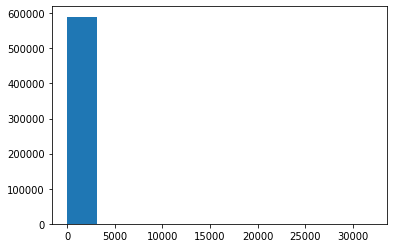

In [22]:
plt.hist(train_transaction["TransactionAmt"])

In [23]:
train_transaction.isFraud

0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

In [24]:
reshapedTransactions = train_transaction["card1"].values.reshape(-1,1)

In [25]:
#https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(reshapedTransactions, train_transaction["isFraud"])



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

TransactionID     0.00000
isFraud           0.00000
TransactionDT     0.00000
TransactionAmt    0.00000
ProductCD         0.00000
                   ...   
V335              0.86055
V336              0.86055
V337              0.86055
V338              0.86055
V339              0.86055
Length: 394, dtype: float64

In [99]:
# Inflection point at x = 0.18 and y = 190. (x = maximum percentage of NAs, y = number of columns for which this is true)
# After this point increasing the threshold of allowed NA-percentage returns only very few extra predictors. 
# Therefore allowing a maximum of 20% NAs would be a reasonable boundary.

rows = train_transaction.shape[0]
naCount = train_transaction.isna().sum()/rows
naCount = naCount.sort_values(ascending=False)
percentageList = naCount.tolist()

upperBounds = []
distribution = []
for limit in range(0,100,1):
    upperBounds.append(limit/100.0)

for bound in upperBounds:
    distribution.append(sum(entry < bound for entry in percentageList))
    
plt.plot(upperBounds,distribution)

In [116]:
# set threshold and fill NAs in data
threshold = 0.2
train_transaction_selection = pd.DataFrame()

for colName in train_transaction:
    naCountColumn = train_transaction[colName].isna().sum()/rows
    if (naCountColumn < threshold):
        train_transaction_selection[colName] = train_transaction[colName]
        

for colName in train_transaction_selection:
    train_transaction_selection.loc[:, (colName)].fillna(train_transaction_selection[colName].mode().iloc[0], inplace = True)

In [111]:
train_transaction_selection

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5   card6  addr1  addr2  \
0       13926  321.0  150.0    discover  142.0  credit  315.0   87.0   
1        2755  404.0  150.0  mastercard  102.0  credit  325.0   87.0   
2        4663  490.0  150.0        visa  166.0   debit  330.0   87.0   
3       18132  567.0  150.0  mastercard  117.0   debit  476.0   87.0   
4        4497  514.0  150.0  mastercard  102.0  credit  420.0   87.0   
...       ...    ...    ...         ...    ...     ...    ...    ...   
590535   6550  321.0  150.0        visa  226.0   debit  272.0   87.0   
590536  10444  225.0  150.0  mastercard  224.0   debit  204.0   87.0   
590537  12037  595.0  150.0  mastercard  224.0   debit  231.0   87.0   
590538   7826  481.0  150.0  mastercard  224.0   debit  387.0   87.0   
590539  15066  170.0  150.0  mastercard  102.0  credit  299.0   87.0   

       P_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  \
0          gmail.com  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  2.0   
1          gmail.com  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0   
2        outlook.com  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
3          yahoo.com  2.0  5.0  0.0  0.0  0.0  4.0  0.0  0.0  1.0  0.0  1.0   
4          gmail.com  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
590535     gmail.com  2.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  2.0  0.0  1.0   
590536     gmail.com  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0   
590537     gmail.com  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0   
590538       aol.com  1.0  1.0  0.0  0.0  0.0  3.0  0.0  0.0  2.0  0.0  1.0   
590539     gmail.com  2.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  2.0  0.0  1.0   

        C12   C13  C14     D1   D10    D15  V12  V13  V14  V15  V16  V17  V18  \
0       0.0   1.0  1.0   14.0  13.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
1       0.0   1.0  1.0    0.0   0.0    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
2       0.0   1.0  1.0    0.0   0.0  315.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
3       0.0  25.0  1.0  112.0  84.0  111.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
4       0.0   1.0  1.0    0.0   0.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
...     ...   ...  ...    ...   ...    ...  ...  ...  ...  ...  ...  ...  ...   
590535  0.0   3.0  2.0   29.0  56.0   56.0  2.0  2.0  1.0  0.0  0.0  0.0  0.0   
590536  0.0   1.0  1.0    0.0   0.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
590537  0.0   1.0  1.0    0.0   0.0    0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
590538  1.0   5.0  1.0   22.0  22.0   22.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0   
590539  0.0   1.0  1.0    0.0   1.0    1.0  2.0  2.0  1.0  0.0  0.0  0.0  0.0   

        V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  \
0       1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1       1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
2       1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   


In [ ]:
#train_transaction_selection.select_dtypes(include=["number"]).describe()

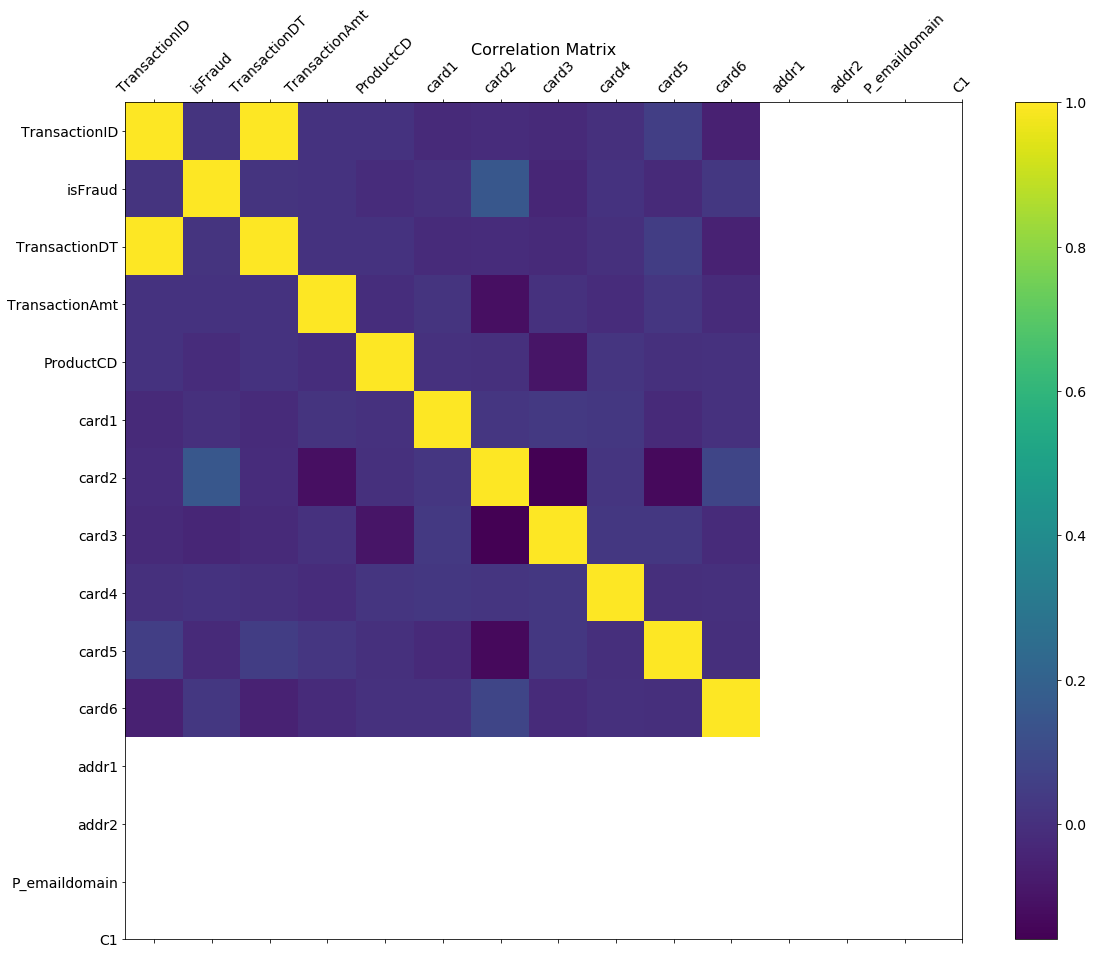

In [112]:
#train_transaction_selection = train_transaction_selection.select_dtypes(include=["number"]).describe()
df = train_transaction_selection.iloc[:,0:15]
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

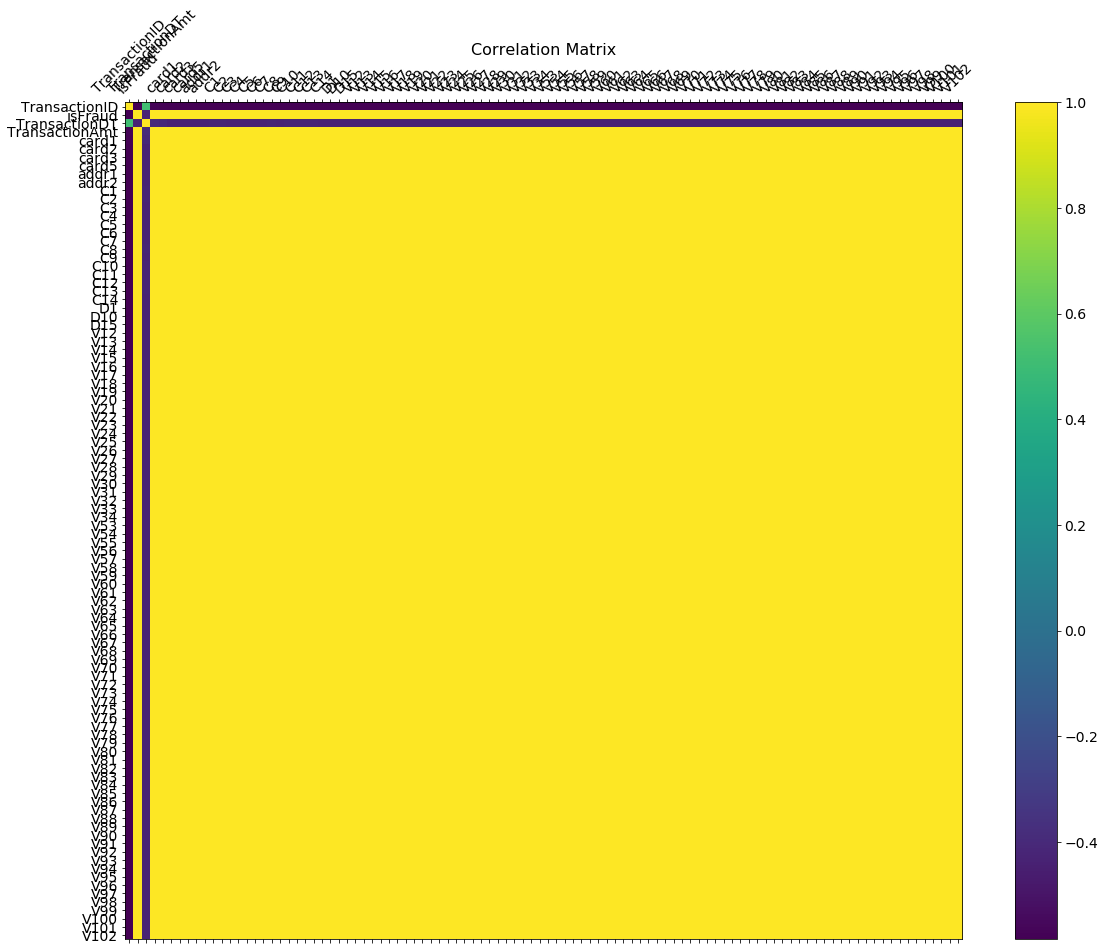

In [113]:
train_transaction_selection_number = train_transaction_selection.select_dtypes(include=["number"]).describe()
df = train_transaction_selection_number.iloc[:,0:100]
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


In [ ]:
plt.plot(upperBounds,distribution)

In [114]:
train_transaction_selection["D10"]

0         13.0
1          0.0
2          0.0
3         84.0
4          0.0
          ... 
590535    56.0
590536     0.0
590537     0.0
590538    22.0
590539     1.0
Name: D10, Length: 590540, dtype: float64

In [105]:
train_transaction_selection.select_dtypes(include=["number"]).describe()

TransactionID        isFraud  TransactionDT  TransactionAmt  \
count   5.905400e+05  590540.000000   5.905400e+05   590540.000000   
mean    3.282270e+06       0.034990   7.372311e+06      135.027176   
std     1.704744e+05       0.183755   4.617224e+06      239.162522   
min     2.987000e+06       0.000000   8.640000e+04        0.251000   
25%     3.134635e+06       0.000000   3.027058e+06       43.321000   
50%     3.282270e+06       0.000000   7.306528e+06       68.769000   
75%     3.429904e+06       0.000000   1.124662e+07      125.000000   
max     3.577539e+06       1.000000   1.581113e+07    31937.391000   

               card1          card2          card3          card5  \
count  590540.000000  581607.000000  588975.000000  586281.000000   
mean     9898.734658     362.555488     153.194925     199.278897   
std      4901.170153     157.793246      11.336444      41.244453   
min      1000.000000     100.000000     100.000000     100.000000   
25%      6019.000000     214.000000     150.000000     166.000000   
50%      9678.000000     361.000000     150.000000     226.000000   
75%     14184.000000     512.000000     150.000000     226.000000   
max     18396.000000     600.000000     231.000000     237.000000   

               addr1          addr2             C1             C2  \
count  524834.000000  524834.000000  590540.000000  590540.000000   
mean      290.733794      86.800630      14.092458      15.269734   
std       101.741072       2.690623     133.569018     154.668899   
min       100.000000      10.000000       0.000000       0.000000   
25%       204.000000      87.000000       1.000000       1.000000   
50%       299.000000      87.000000       1.000000       1.000000   
75%       330.000000      87.000000       3.000000       3.000000   
max       540.000000     102.000000    4685.000000    5691.000000   

                  C3             C4             C5             C6  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        0.005644       4.092185       5.571526       9.071082   
std         0.150536      68.848459      25.786976      71.508467   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       0.000000       1.000000       2.000000   
max        26.000000    2253.000000     349.000000    2253.000000   

                  C7             C8             C9            C10  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean        2.848478       5.144574       4.480240       5.240343   
std        61.727304      95.378574      16.674897      95.581443   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       1.000000       0.000000   
75%         0.000000       0.000000       2.000000       0.000000   
max      2255.000000    3331.000000     210.000000    3257.000000   

                 C11            C12            C13            C14  \
count  590540.000000  590540.000000  590540.000000  590540.000000   
mean       10.241521       4.076227      32.539918       8.295215   
std        94.336292      86.666218     129.364844      49.544262   
min         0.000000       0.000000       0.000000       0.000000   
25%         1.000000       0.000000       1.000000       1.000000   
50%         1.000000       0.000000       3.000000       1.000000   
75%         2.000000       0.000000      12.000000       2.000000   
max      3188.000000    3188.000000    2918.000000    1429.000000   

                  D1            D10            D15            V12  \
count  589271.000000  514518.000000  501427.000000  514467.000000   
mean       94.347568     123.982137     163.744579       0.559711   
std       157.660387     182.615225     202.726660       0.